#**Business Understanding**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import Image, display, Markdown
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
from IPython.display import Image
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#**Data Understanding**

In [ ]:
link = 'https://raw.githubusercontent.com/Chelseaayu/Chelseaayu/main/MY2022%20Fuel%20Consumption%20Ratings.csv'
df = pd.read_csv(link)
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [ ]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [ ]:
df.nunique()

Model Year                             1
Make                                  39
Model                                715
Vehicle Class                         14
Engine Size(L)                        36
Cylinders                              8
Transmission                          23
Fuel Type                              4
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Comb (mpg))          49
CO2 Emissions(g/km)                  242
CO2 Rating                            10
Smog Rating                            5
dtype: int64

#**Data Preparation**

In [ ]:
# mengubah nama kolom
df = df.rename(columns={'Model Year':'model-year', 'Make':'Brand', 'Vehicle Class':'vehicle-class', 'Engine Size(L)':'engine-size-L', 'Fuel Type':'fuel-type', 'Fuel Consumption (City (L/100 km)':'fuel_con_city-L/100km', 'Fuel Consumption(Hwy (L/100 km))':'fuel_con_hwy-L/100km', 'Fuel Consumption(Comb (L/100 km))':'fuel_con_comb-L/100km', 'Fuel Consumption(Comb (mpg))':'fuel_con_comb-mpg', 'CO2 Emissions(g/km)':'co2_emission-g/km', 'CO2 Rating':'co2_rating', 'Smog Rating':'smog_rating'})
df

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,fuel_con_city-L/100km,fuel_con_hwy-L/100km,fuel_con_comb-L/100km,fuel_con_comb-mpg,co2_emission-g/km,co2_rating,smog_rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [ ]:
# memecah kolom Transmission menjadi transmission dan gear
df[['Transmission', 'Gear']] = df['Transmission'].str.extract(r'([A-Z]+)(\d+)')
df.head()

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,fuel_con_city-L/100km,fuel_con_hwy-L/100km,fuel_con_comb-L/100km,fuel_con_comb-mpg,co2_emission-g/km,co2_rating,smog_rating,Gear
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,9.9,7.0,8.6,33,200,6,3,8
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,12.6,9.4,11.2,25,263,4,5,10
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,11.0,8.6,9.9,29,232,5,6,10
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,11.3,9.1,10.3,27,242,5,6,10
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,11.2,8.0,9.8,29,230,5,7,10


In [ ]:
df.columns

Index(['model-year', 'Brand', 'Model', 'vehicle-class', 'engine-size-L',
       'Cylinders', 'Transmission', 'fuel-type', 'fuel_con_city-L/100km',
       'fuel_con_hwy-L/100km', 'fuel_con_comb-L/100km', 'fuel_con_comb-mpg',
       'co2_emission-g/km', 'co2_rating', 'smog_rating', 'Gear'],
      dtype='object')

In [ ]:
# cek missing value
df.isnull().sum()

model-year                0
Brand                     0
Model                     0
vehicle-class             0
engine-size-L             0
Cylinders                 0
Transmission             43
fuel-type                 0
fuel_con_city-L/100km     0
fuel_con_hwy-L/100km      0
fuel_con_comb-L/100km     0
fuel_con_comb-mpg         0
co2_emission-g/km         0
co2_rating                0
smog_rating               0
Gear                     43
dtype: int64

In [ ]:
# mengatasi missing value menggunakan SimpleImputer nilai yang sering muncul
imputer = SimpleImputer(strategy='most_frequent')
df[['Transmission', 'Gear']] = imputer.fit_transform(df[['Transmission', 'Gear']])
df.head()

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,fuel_con_city-L/100km,fuel_con_hwy-L/100km,fuel_con_comb-L/100km,fuel_con_comb-mpg,co2_emission-g/km,co2_rating,smog_rating,Gear
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,9.9,7.0,8.6,33,200,6,3,8
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,12.6,9.4,11.2,25,263,4,5,10
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,11.0,8.6,9.9,29,232,5,6,10
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,11.3,9.1,10.3,27,242,5,6,10
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,11.2,8.0,9.8,29,230,5,7,10


In [ ]:
df.isnull().sum()

model-year               0
Brand                    0
Model                    0
vehicle-class            0
engine-size-L            0
Cylinders                0
Transmission             0
fuel-type                0
fuel_con_city-L/100km    0
fuel_con_hwy-L/100km     0
fuel_con_comb-L/100km    0
fuel_con_comb-mpg        0
co2_emission-g/km        0
co2_rating               0
smog_rating              0
Gear                     0
dtype: int64

In [ ]:
# cek duplikasi data
duplikasi = df.duplicated(subset = None)
jmlh_duplikasi = duplikasi.sum()
print('Duplikasi data : ', jmlh_duplikasi)

Duplikasi data :  0


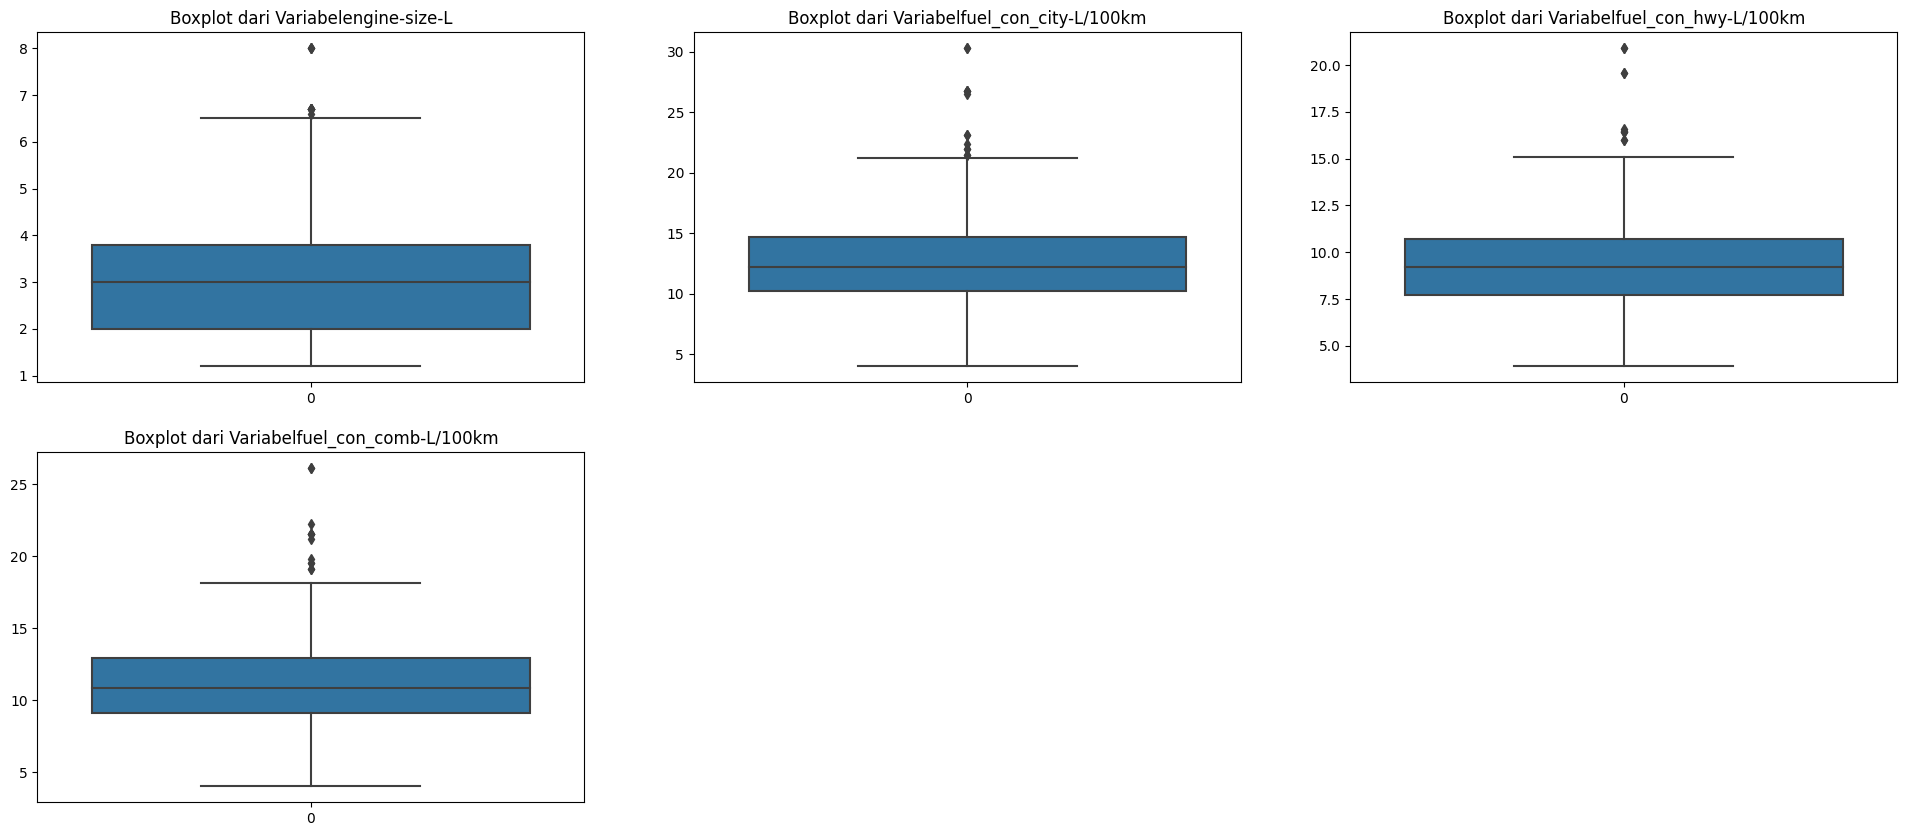

In [ ]:
# mendeteksi outlier dari masing-masing kolom
pos = 1

fig = plt.figure(figsize=(24, 10))

for col in df.columns:
    if isinstance(df[col][0], float):
        ax = fig.add_subplot(2, 3, pos)
        pos += 1
        sns.boxplot(df[col])
        plt.title("Boxplot dari Variabel" + col)

plt.show()


In [ ]:
# menghitung banyak outlier dari masing-masing kolom
for col in df.columns:
    if isinstance(df[col][0], float):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - (1.5 * IQR)
        batas_atas = Q3 + (1.5 * IQR)
        jumlah_outlier = df[(df[col] < batas_bawah) | (df[col] > batas_atas)].shape[0]
        print('Jumlah data outlier', col, "adalah :", jumlah_outlier)


Jumlah data outlier engine-size-L adalah : 11
Jumlah data outlier fuel_con_city-L/100km adalah : 13
Jumlah data outlier fuel_con_hwy-L/100km adalah : 10
Jumlah data outlier fuel_con_comb-L/100km adalah : 13


In [ ]:
# menghapus outlier
for col in df.columns:
    if isinstance(df[col][0], float):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
# menghitung lagi banyak outlier dari masing-masing kolom
for col in df.columns:
    if isinstance(df[col][0], float):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - (1.5 * IQR)
        batas_atas = Q3 + (1.5 * IQR)
        jumlah_outlier = df[(df[col] < batas_bawah) | (df[col] > batas_atas)].shape[0]
        print('Jumlah data outlier', col, "adalah :", jumlah_outlier)

Jumlah data outlier engine-size-L adalah : 41
Jumlah data outlier fuel_con_city-L/100km adalah : 1
Jumlah data outlier fuel_con_hwy-L/100km adalah : 0
Jumlah data outlier fuel_con_comb-L/100km adalah : 0


In [ ]:
# menghapus outlier
for col in df.columns:
    if isinstance(df[col][0], float):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
# menghitung lagi banyak outlier dari masing-masing kolom
for col in df.columns:
    if isinstance(df[col][0], float):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - (1.5 * IQR)
        batas_atas = Q3 + (1.5 * IQR)
        jumlah_outlier = df[(df[col] < batas_bawah) | (df[col] > batas_atas)].shape[0]
        print('Jumlah data outlier', col, "adalah :", jumlah_outlier)

Jumlah data outlier engine-size-L adalah : 0
Jumlah data outlier fuel_con_city-L/100km adalah : 6
Jumlah data outlier fuel_con_hwy-L/100km adalah : 0
Jumlah data outlier fuel_con_comb-L/100km adalah : 0


In [ ]:
# menghapus outlier
for col in df.columns:
    if isinstance(df[col][0], float):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
# menghitung lagi banyak outlier dari masing-masing kolom
for col in df.columns:
    if isinstance(df[col][0], float):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - (1.5 * IQR)
        batas_atas = Q3 + (1.5 * IQR)
        jumlah_outlier = df[(df[col] < batas_bawah) | (df[col] > batas_atas)].shape[0]
        print('Jumlah data outlier', col, "adalah :", jumlah_outlier)

Jumlah data outlier engine-size-L adalah : 0
Jumlah data outlier fuel_con_city-L/100km adalah : 0
Jumlah data outlier fuel_con_hwy-L/100km adalah : 0
Jumlah data outlier fuel_con_comb-L/100km adalah : 0


In [ ]:
df

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,fuel_con_city-L/100km,fuel_con_hwy-L/100km,fuel_con_comb-L/100km,fuel_con_comb-mpg,co2_emission-g/km,co2_rating,smog_rating,Gear
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,9.9,7.0,8.6,33,200,6,3,8
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,12.6,9.4,11.2,25,263,4,5,10
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,11.0,8.6,9.9,29,232,5,6,10
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,11.3,9.1,10.3,27,242,5,6,10
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,11.2,8.0,9.8,29,230,5,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS,Z,10.7,7.7,9.4,30,219,5,5,8
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS,Z,10.5,8.1,9.4,30,219,5,5,8
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS,Z,11.0,8.7,9.9,29,232,5,7,8
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS,Z,11.5,8.4,10.1,28,236,5,5,8


In [ ]:
# tipe data
df.dtypes

model-year                 int64
Brand                     object
Model                     object
vehicle-class             object
engine-size-L            float64
Cylinders                  int64
Transmission              object
fuel-type                 object
fuel_con_city-L/100km    float64
fuel_con_hwy-L/100km     float64
fuel_con_comb-L/100km    float64
fuel_con_comb-mpg          int64
co2_emission-g/km          int64
co2_rating                 int64
smog_rating                int64
Gear                      object
dtype: object

In [ ]:
# mengubah satuan mpg pada fuel consumption combination menjadi L
df['fuel_con_comb-mpg'] = 235/df['fuel_con_comb-mpg']

# mengubah nama kolom dari fuel_con_comb-mpg menjadi fuel_con_comb-L
df.rename(columns = {'fuel_con_comb-mpg':'fuel_con_comb-L'}, inplace = True)

df.head()

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,fuel_con_city-L/100km,fuel_con_hwy-L/100km,fuel_con_comb-L/100km,fuel_con_comb-L,co2_emission-g/km,co2_rating,smog_rating,Gear
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,9.9,7.0,8.6,7.121212,200,6,3,8
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,12.6,9.4,11.2,9.400000,263,4,5,10
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,11.0,8.6,9.9,8.103448,232,5,6,10
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,11.3,9.1,10.3,8.703704,242,5,6,10
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,11.2,8.0,9.8,8.103448,230,5,7,10


In [ ]:
num_att = df[['engine-size-L', 'fuel_con_city-L/100km', 'fuel_con_hwy-L/100km', 'fuel_con_comb-L/100km', 'fuel_con_comb-L',
              'co2_emission-g/km', 'co2_rating', 'smog_rating']]

# menghitung vif score
vif_scores = pd.Series([variance_inflation_factor(num_att.values, i) for i in range(num_att.shape[1])], index=num_att.columns)
print(vif_scores)


engine-size-L               23.565531
fuel_con_city-L/100km    32426.281763
fuel_con_hwy-L/100km     12511.712502
fuel_con_comb-L/100km    88960.658302
fuel_con_comb-L           7060.047747
co2_emission-g/km          822.518600
co2_rating                  12.394222
smog_rating                 15.859864
dtype: float64


In [ ]:
# menggabungkan 3 kolom dengan VIF Score tertinggi
df['fuel_con_avg-L/100km'] = df[['fuel_con_city-L/100km', 'fuel_con_hwy-L/100km', 'fuel_con_comb-L/100km']].mean(axis=1)
df = df.drop(columns=['fuel_con_city-L/100km', 'fuel_con_hwy-L/100km', 'fuel_con_comb-L/100km'])
df.head()

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,fuel_con_comb-L,co2_emission-g/km,co2_rating,smog_rating,Gear,fuel_con_avg-L/100km
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,7.121212,200,6,3,8,8.500000
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,9.400000,263,4,5,10,11.066667
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,8.103448,232,5,6,10,9.833333
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,8.703704,242,5,6,10,10.233333
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,8.103448,230,5,7,10,9.666667


In [ ]:
# menghapus kolom dengan vif scores tinggi
df.drop(columns=['fuel_con_comb-L'], inplace = True)

In [ ]:
# statistika deskriptif
df.describe()

,model-year,engine-size-L,Cylinders,co2_emission-g/km,co2_rating,smog_rating,fuel_con_avg-L/100km
count,862.0,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,2022.0,2.964849,5.396752,250.982599,4.678654,5.070766,10.582444
std,0.0,1.111750,1.634525,54.459745,1.334779,1.569410,2.299509
min,2022.0,1.200000,3.000000,111.000000,2.000000,1.000000,4.800000
25%,2022.0,2.000000,4.000000,211.000000,4.000000,5.000000,8.941667
50%,2022.0,2.900000,6.000000,252.000000,5.000000,5.000000,10.433333
75%,2022.0,3.600000,6.000000,288.000000,5.000000,6.000000,12.100000
max,2022.0,6.000000,12.000000,385.000000,9.000000,7.000000,16.266667


In [ ]:
# encoding kolom fuel-type
encoding_fuel = 'fuel-type'

unique_values_fuel = df[encoding_fuel].unique()
encoding_mapping_fuel = {value: index for index, value in enumerate(unique_values_fuel)}
df['fuel_type_encoding'] = df[encoding_fuel].map(encoding_mapping_fuel)
df

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,co2_emission-g/km,co2_rating,smog_rating,Gear,fuel_con_avg-L/100km,fuel_type_encoding
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,200,6,3,8,8.500000,0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,263,4,5,10,11.066667,0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,232,5,6,10,9.833333,0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,242,5,6,10,10.233333,0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,230,5,7,10,9.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS,Z,219,5,5,8,9.266667,0
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS,Z,219,5,5,8,9.333333,0
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS,Z,232,5,7,8,9.866667,0
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS,Z,236,5,5,8,10.000000,0


In [ ]:
# keterangan hasil encoding fuel-type
encoding_mapping_fuel

{'Z': 0, 'X': 1, 'D': 2, 'E': 3}

X = Regular Gasoline

Z = Premium Gasoline

D = Diesel

E = Ethanol

In [ ]:
# encoding kolom vehicle-class
encoding_vehicle = 'vehicle-class'

unique_values_veh = df[encoding_vehicle].unique()
encoding_mapping_vehicle = {value: index for index, value in enumerate(unique_values_veh)}
df['vehicle_class_encoding'] = df[encoding_vehicle].map(encoding_mapping_vehicle)
df

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,co2_emission-g/km,co2_rating,smog_rating,Gear,fuel_con_avg-L/100km,fuel_type_encoding,vehicle_class_encoding
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,200,6,3,8,8.500000,0,0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,263,4,5,10,11.066667,0,1
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,232,5,6,10,9.833333,0,1
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,242,5,6,10,10.233333,0,1
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,230,5,7,10,9.666667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS,Z,219,5,5,8,9.266667,0,1
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS,Z,219,5,5,8,9.333333,0,1
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS,Z,232,5,7,8,9.866667,0,1
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS,Z,236,5,5,8,10.000000,0,4


In [ ]:
encoding_mapping_vehicle

{'Compact': 0,
 'SUV: Small': 1,
 'Mid-size': 2,
 'Minicompact': 3,
 'SUV: Standard': 4,
 'Two-seater': 5,
 'Subcompact': 6,
 'Station wagon: Small': 7,
 'Station wagon: Mid-size': 8,
 'Full-size': 9,
 'Pickup truck: Small': 10,
 'Pickup truck: Standard': 11,
 'Minivan': 12,
 'Special purpose vehicle': 13}

Hasil encoding kolom vehicle-class


*   Compact = 0
*   SUV: Small = 1
* Mid-size = 2
* Minicompact = 3
* SUV: Standard = 4
* Two-seater = 5
* Subcompact = 6
* Station wagon: Small = 7
* Station wagon: Mid-size = 8
* Full-size =  9
* Pickup truck: Small = 10
* Pickup truck: Standard = 11
* Minivan = 12
* Special purpose vehicle = 13








In [ ]:
# encoding kolom Transmission
encoding_transmission = 'Transmission'

unique_values_trans = df[encoding_transmission].unique()
encoding_mapping_trans = {value: index for index, value in enumerate(unique_values_trans)}
df['transmission_encoding'] = df[encoding_transmission].map(encoding_mapping_trans)
df

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,co2_emission-g/km,co2_rating,smog_rating,Gear,fuel_con_avg-L/100km,fuel_type_encoding,vehicle_class_encoding,transmission_encoding
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,200,6,3,8,8.500000,0,0,0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,263,4,5,10,11.066667,0,1,1
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,232,5,6,10,9.833333,0,1,1
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,242,5,6,10,10.233333,0,1,1
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,230,5,7,10,9.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS,Z,219,5,5,8,9.266667,0,1,1
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS,Z,219,5,5,8,9.333333,0,1,1
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS,Z,232,5,7,8,9.866667,0,1,1
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS,Z,236,5,5,8,10.000000,0,4,1


In [ ]:
# hasil encoding kolom transmission
encoding_mapping_trans

{'AM': 0, 'AS': 1, 'A': 2, 'M': 3, 'AV': 4}

In [ ]:
# encoding kolom brand
encoding_Brand = 'Brand'

unique_values_brand = df[encoding_Brand].unique()
encoding_mapping_brand = {value: index for index, value in enumerate(unique_values_brand)}
df['brand_encoding'] = df[encoding_Brand].map(encoding_mapping_brand)
df

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,co2_emission-g/km,co2_rating,smog_rating,Gear,fuel_con_avg-L/100km,fuel_type_encoding,vehicle_class_encoding,transmission_encoding,brand_encoding
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,200,6,3,8,8.500000,0,0,0,0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,263,4,5,10,11.066667,0,1,1,0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,232,5,6,10,9.833333,0,1,1,0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,242,5,6,10,10.233333,0,1,1,0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,230,5,7,10,9.666667,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS,Z,219,5,5,8,9.266667,0,1,1,36
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS,Z,219,5,5,8,9.333333,0,1,1,36
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS,Z,232,5,7,8,9.866667,0,1,1,36
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS,Z,236,5,5,8,10.000000,0,4,1,36


In [ ]:
# hasil encoding kolom brand
encoding_mapping_brand

{'Acura': 0,
 'Alfa Romeo': 1,
 'Aston Martin': 2,
 'Audi': 3,
 'Bentley': 4,
 'BMW': 5,
 'Buick': 6,
 'Cadillac': 7,
 'Chevrolet': 8,
 'Chrysler': 9,
 'Dodge': 10,
 'FIAT': 11,
 'Ford': 12,
 'Genesis': 13,
 'GMC': 14,
 'Honda': 15,
 'Hyundai': 16,
 'Infiniti': 17,
 'Jaguar': 18,
 'Jeep': 19,
 'Kia': 20,
 'Lamborghini': 21,
 'Land Rover': 22,
 'Lexus': 23,
 'Lincoln': 24,
 'Maserati': 25,
 'Mazda': 26,
 'Mercedes-Benz': 27,
 'MINI': 28,
 'Mitsubishi': 29,
 'Nissan': 30,
 'Porsche': 31,
 'Ram': 32,
 'Subaru': 33,
 'Toyota': 34,
 'Volkswagen': 35,
 'Volvo': 36}

In [ ]:
df.dtypes

model-year                  int64
Brand                      object
Model                      object
vehicle-class              object
engine-size-L             float64
Cylinders                   int64
Transmission               object
fuel-type                  object
co2_emission-g/km           int64
co2_rating                  int64
smog_rating                 int64
Gear                       object
fuel_con_avg-L/100km      float64
fuel_type_encoding          int64
vehicle_class_encoding      int64
transmission_encoding       int64
brand_encoding              int64
dtype: object

In [ ]:
df.head()

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,co2_emission-g/km,co2_rating,smog_rating,Gear,fuel_con_avg-L/100km,fuel_type_encoding,vehicle_class_encoding,transmission_encoding,brand_encoding
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,200,6,3,8,8.500000,0,0,0,0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,263,4,5,10,11.066667,0,1,1,0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,232,5,6,10,9.833333,0,1,1,0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,242,5,6,10,10.233333,0,1,1,0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,230,5,7,10,9.666667,0,0,1,0


In [ ]:
# menyimpan hasil data preparation untuk dilakukan visualisasi pada Google Data Studio
df.to_csv('Vehicle_Product_Research_for_Better_Emission.csv', index = False)

#**EDA**

In [ ]:
# banyaknya kendaraan berdasarkan jenis bahan bakar yang digunakan
fuel_type_counts = df['fuel-type'].value_counts()
print(fuel_type_counts)

X    433
Z    397
D     28
E      4
Name: fuel-type, dtype: int64


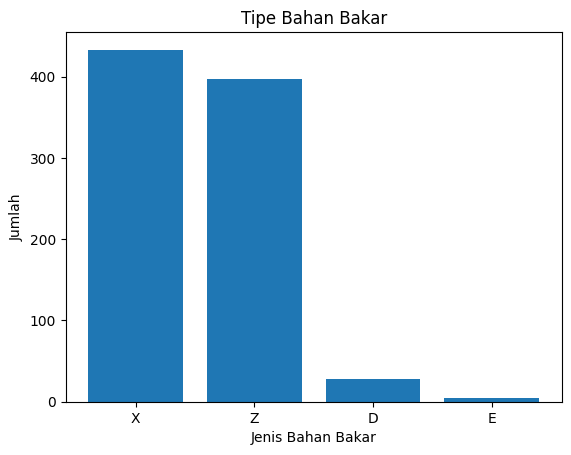

In [ ]:
plt.bar(fuel_type_counts.index, fuel_type_counts.values)
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Jumlah')
plt.title('Tipe Bahan Bakar')
plt.show()

Legenda


*   X = regular gasoline
*   Z = premium gasoline
*   D = diesel
*   E = ethanol

In [ ]:
df.head()

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,co2_emission-g/km,co2_rating,smog_rating,Gear,fuel_con_avg-L/100km,fuel_type_encoding,vehicle_class_encoding,transmission_encoding,brand_encoding
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,200,6,3,8,8.500000,0,0,0,0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,263,4,5,10,11.066667,0,1,1,0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,232,5,6,10,9.833333,0,1,1,0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,242,5,6,10,10.233333,0,1,1,0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,230,5,7,10,9.666667,0,0,1,0


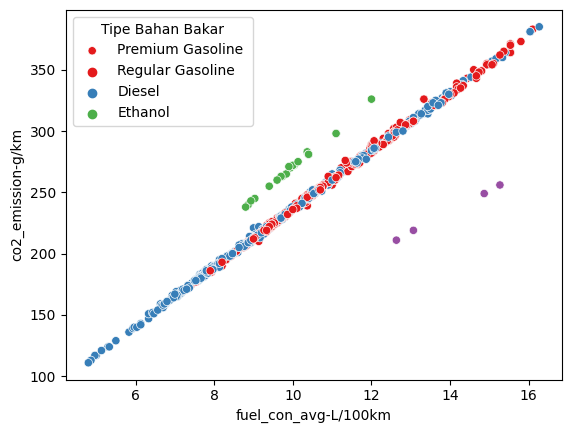

In [ ]:
# hubungan antara kombinasi konsumsi bahan bakar dengan tipe bahan bakar
g = sns.scatterplot(x='fuel_con_avg-L/100km',
                    y='co2_emission-g/km',
                    data=df,
                    hue='fuel_type_encoding',
                    palette='Set1')
mapping_fuel_type = {0: 'Premium Gasoline ', 1: 'Regular Gasoline', 2: 'Diesel', 3: 'Ethanol'}
g.legend(title = 'Tipe Bahan Bakar', labels=mapping_fuel_type.values())
plt.show()

<Figure size 2000x1200 with 0 Axes>

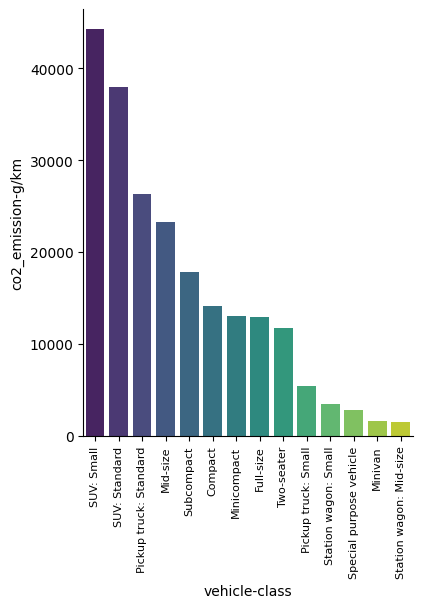

In [ ]:
# tingkatan kelas kendaraan berdasarkan emisi co2 yang dihasilkan
df_make = df[['vehicle-class', 'co2_emission-g/km']]
df_make = df_make.groupby('vehicle-class').sum().sort_values(by = 'co2_emission-g/km', ascending = False)[:20].reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'vehicle-class', y = 'co2_emission-g/km', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

<Figure size 2000x1200 with 0 Axes>

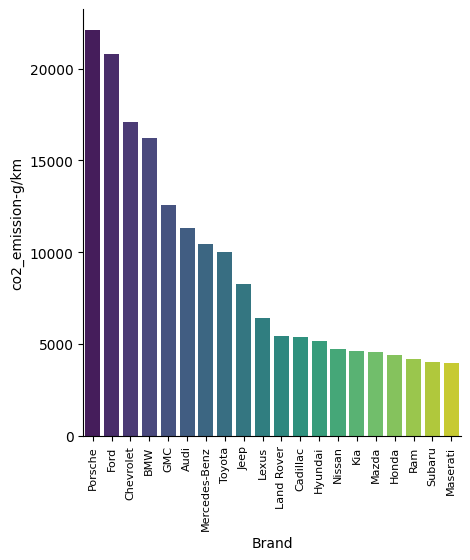

In [ ]:
# tingkatan merk kendaraan berdasarkan emisi co2 yang dihasilkan
df_make = df[['Brand', 'co2_emission-g/km']]
df_make = df_make.groupby('Brand').sum().sort_values(by = 'co2_emission-g/km', ascending = False)[:20].reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Brand', y = 'co2_emission-g/km', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

<Figure size 2000x1200 with 0 Axes>

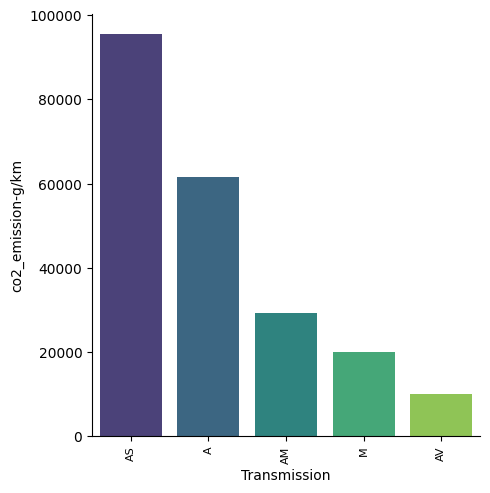

In [ ]:
# tingkatan transmisi berdasarkan emisi co2 yang dihasilkan
df_make = df[['Transmission', 'co2_emission-g/km']]
df_make = df_make.groupby('Transmission').sum().sort_values(by = 'co2_emission-g/km', ascending = False)[:20].reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Transmission', y = 'co2_emission-g/km', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

<Figure size 2000x1200 with 0 Axes>

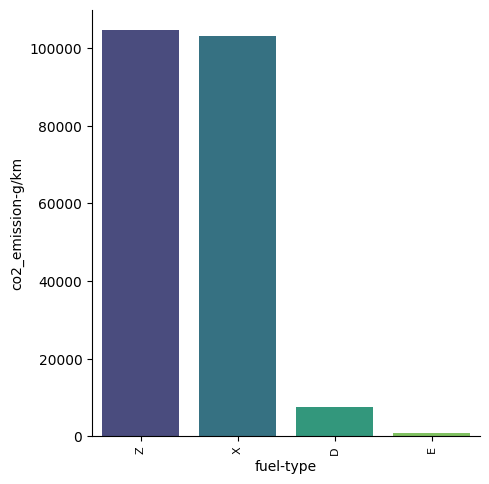

In [ ]:
# tingkatan tipe bahan bakar berdasarkan emisi co2 yang dihasilkan
df_make = df[['fuel-type', 'co2_emission-g/km']]
df_make = df_make.groupby('fuel-type').sum().sort_values(by = 'co2_emission-g/km', ascending = False)[:20].reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'fuel-type', y = 'co2_emission-g/km', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

SUV: Small                 194
SUV: Standard              128
Mid-size                   105
Pickup truck: Standard      88
Subcompact                  74
Compact                     68
Full-size                   53
Minicompact                 47
Two-seater                  43
Pickup truck: Small         20
Station wagon: Small        17
Special purpose vehicle     12
Minivan                      7
Station wagon: Mid-size      6
Name: vehicle-class, dtype: int64


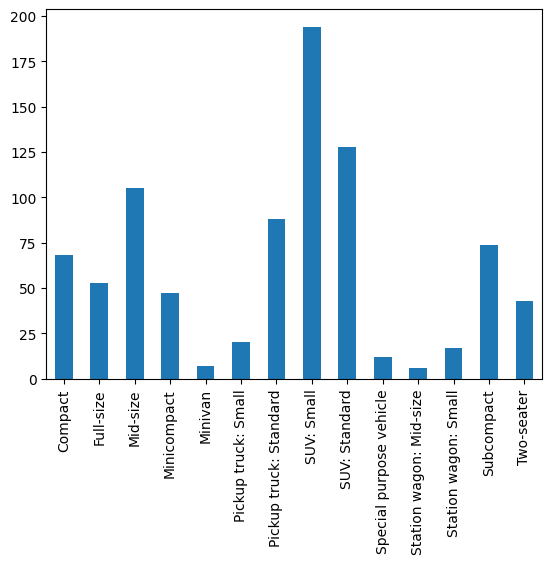

In [ ]:
#jumlah kendaraan berdasarkan kelas kendaraan
vehicle_counts = df['vehicle-class'].value_counts()
print(vehicle_counts)
df['vehicle-class'].value_counts().sort_index().plot(kind='bar')
plt.show()

Ford             79
Porsche          77
Chevrolet        61
BMW              59
Toyota           49
Audi             45
Mercedes-Benz    43
GMC              42
Jeep             32
Lexus            28
Hyundai          26
Kia              23
Nissan           23
Honda            23
Mazda            23
Cadillac         22
MINI             20
Subaru           19
Land Rover       18
Volkswagen       18
Ram              15
Maserati         13
Volvo            12
Dodge             9
Buick             9
Acura             8
Infiniti          8
Genesis           8
Jaguar            8
Lincoln           7
Mitsubishi        7
Alfa Romeo        6
Chrysler          6
Bentley           6
Aston Martin      5
Lamborghini       4
FIAT              1
Name: Brand, dtype: int64


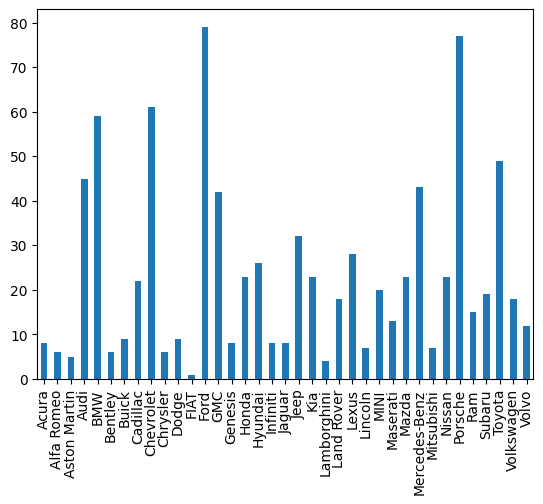

In [ ]:
#jumlah kendaraan berdasarkan brand
brand_counts = df['Brand'].value_counts()
print(brand_counts)
df['Brand'].value_counts().sort_index().plot(kind='bar')
plt.show()

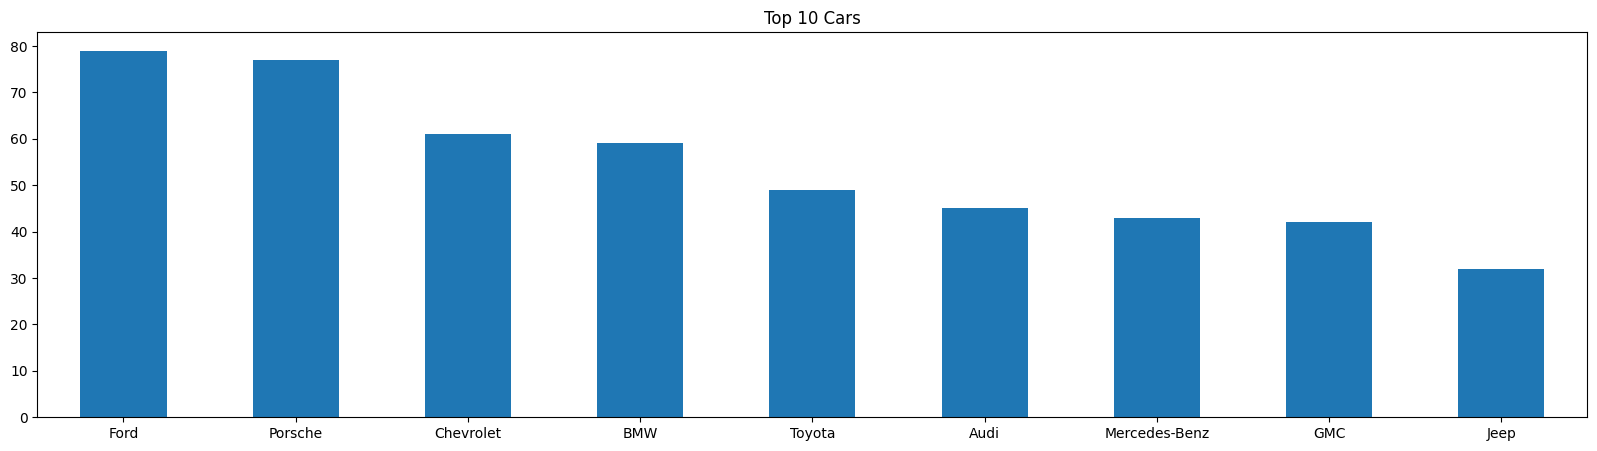

In [ ]:
#10 mobil dengan popularitas terbanyak
df['Brand'].value_counts().sort_values(ascending=False).iloc[0:9].plot(kind='bar',figsize=(20,5),rot=0,title = 'Top 10 Cars')
plt.savefig('brand.jpg')

AS    386
A     223
AM    117
M      83
AV     53
Name: Transmission, dtype: int64


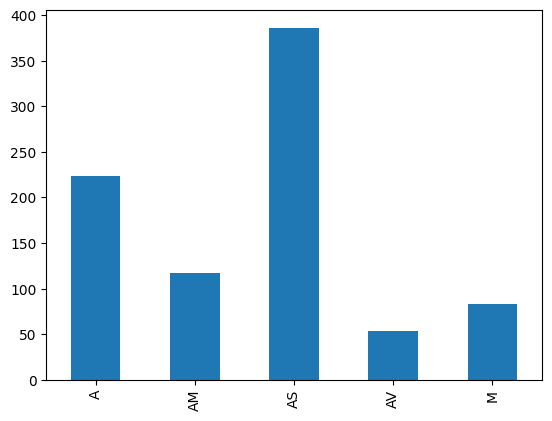

In [ ]:
#jumlah kendaraan berdasarkan jenis transmisi pada mobil
transmission_counts = df['Transmission'].value_counts()
print(transmission_counts)
df['Transmission'].value_counts().sort_index().plot(kind='bar')
plt.show()

4     397
6     290
8     141
3      21
10      8
12      4
5       1
Name: Cylinders, dtype: int64


<Axes: title={'center': 'Composition of cars by #Cylinders'}>

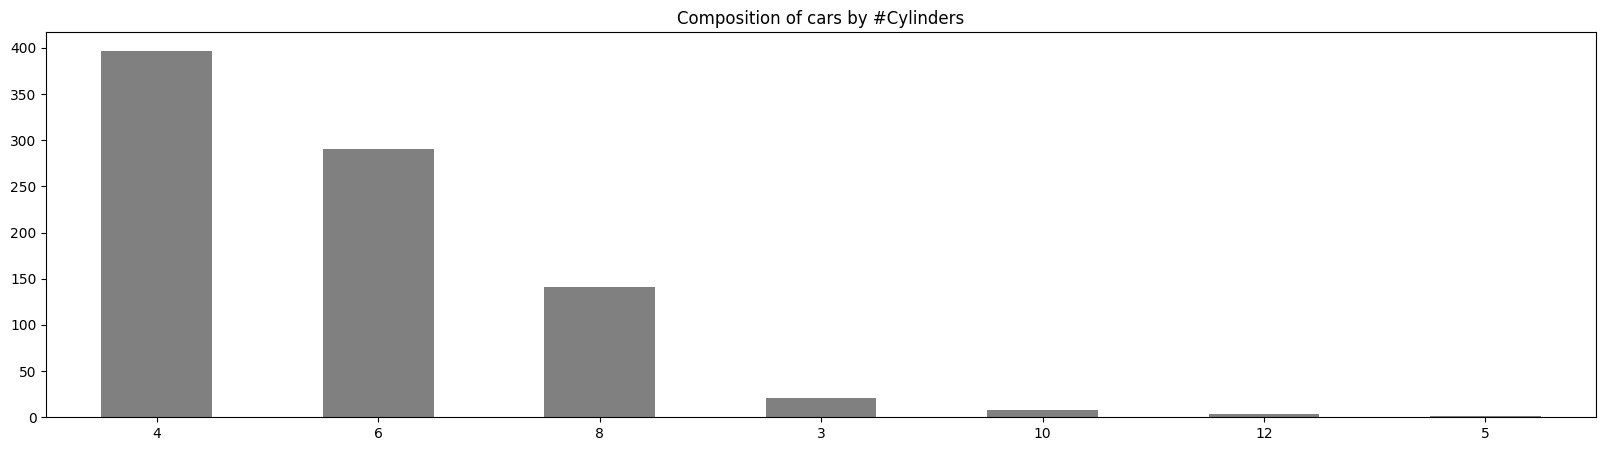

In [ ]:
#jumlah kendaraan berdasarkan jenis silinder
cylinder_counts = df['Cylinders'].value_counts()
print(cylinder_counts)
df['Cylinders'].value_counts().sort_values(ascending=False).plot(kind='bar',rot=0,figsize=(20,5),color='grey',title='Composition of cars by #Cylinders')

<ipython-input-51-f58eceff4a68>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  emission_corr = df.corr()


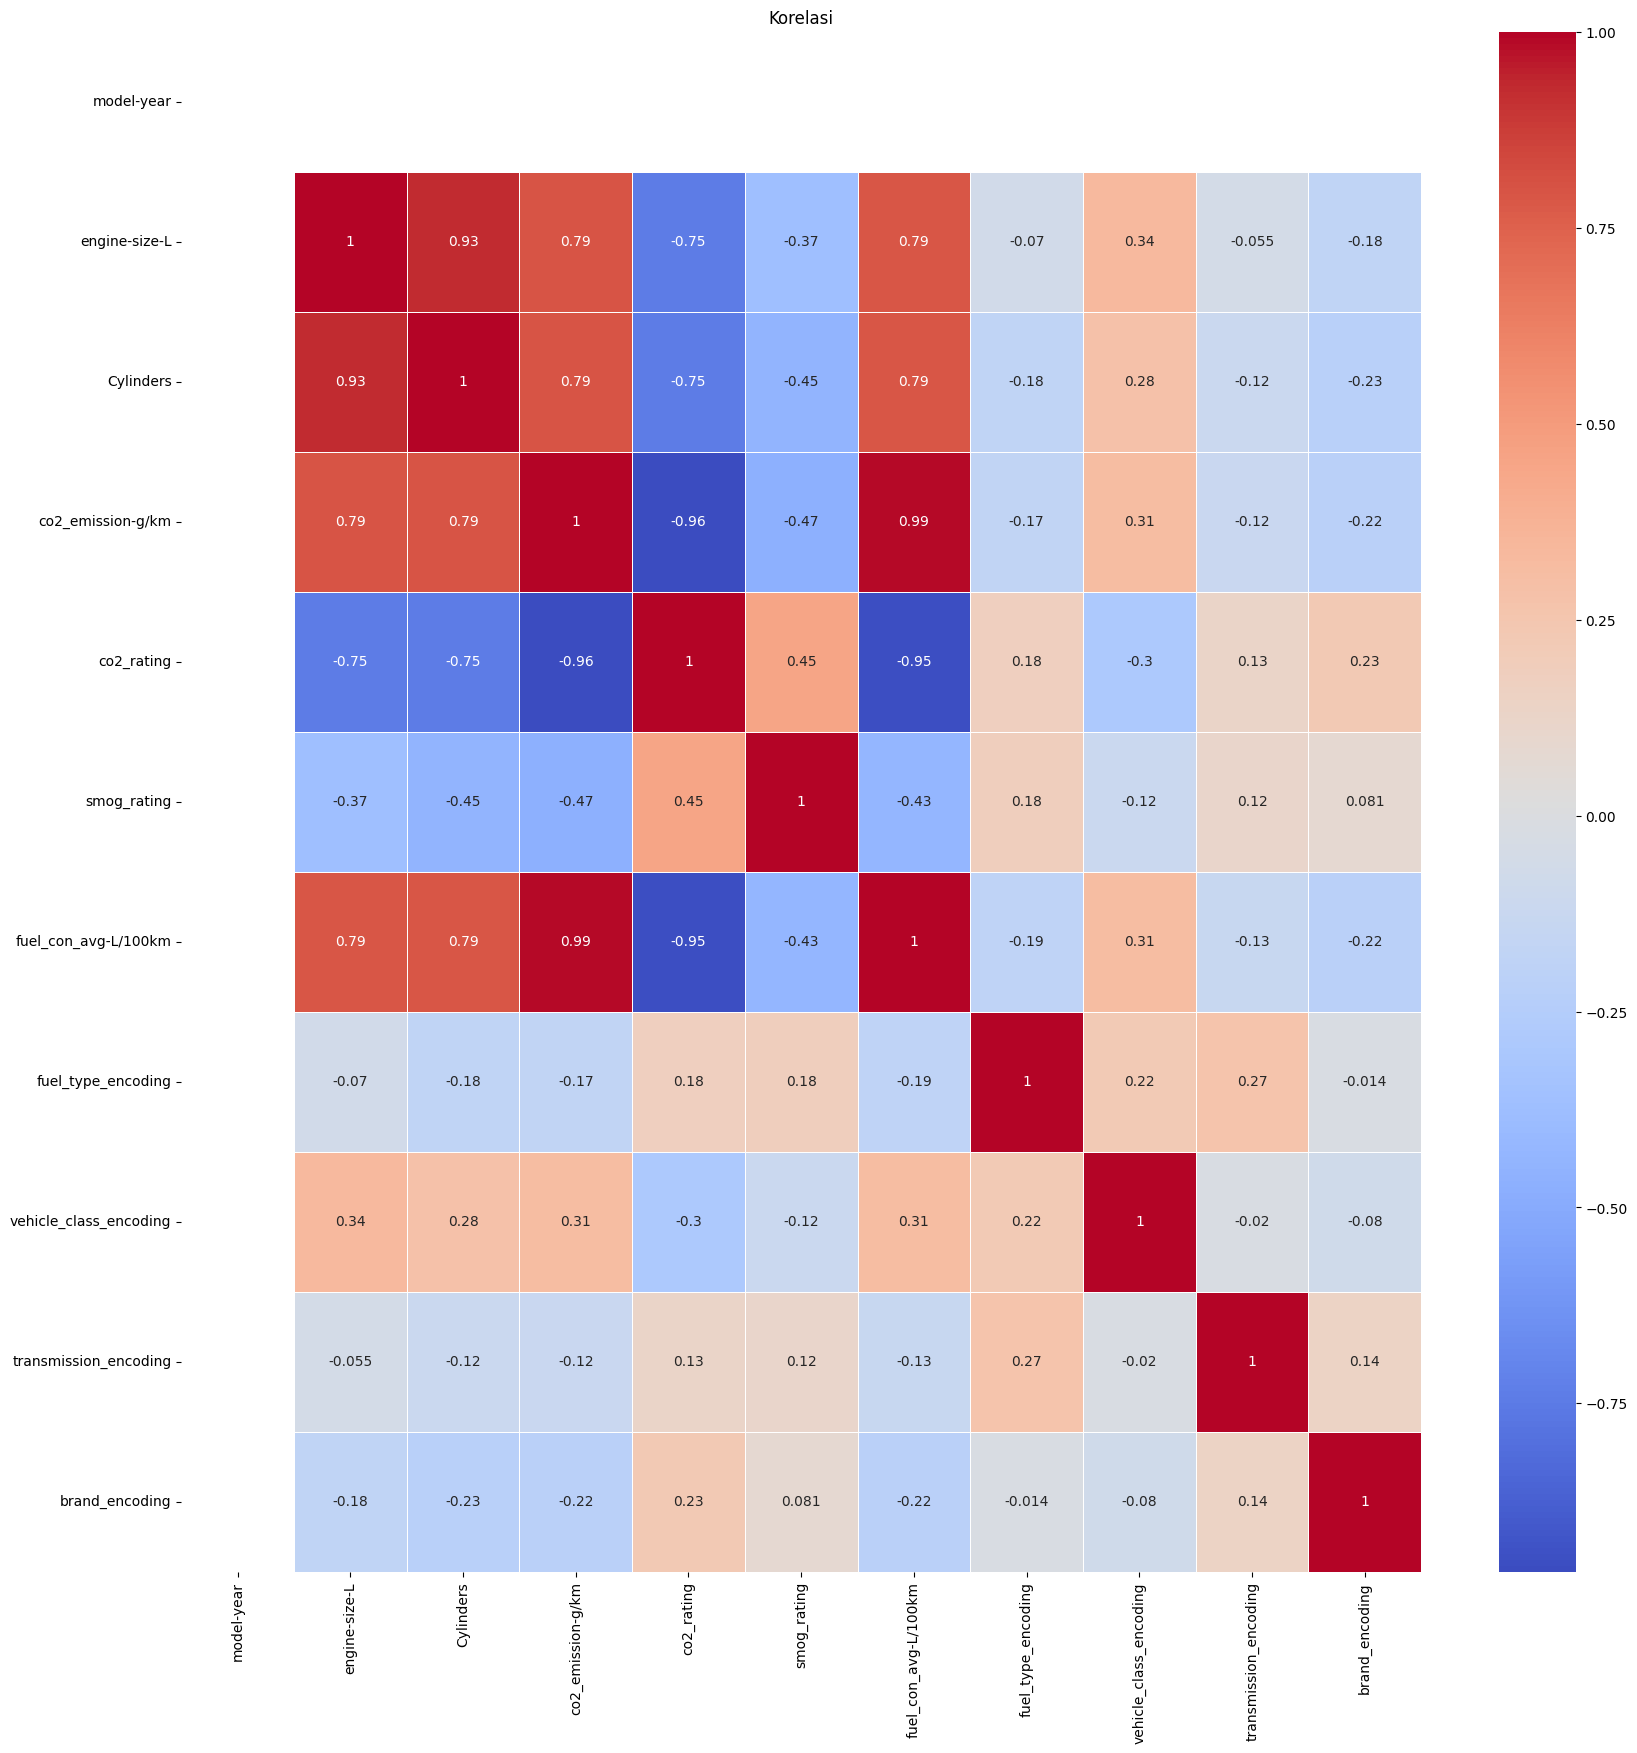

In [ ]:
# korelasi
emission_corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(emission_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi')
plt.show()

#**Modelling**

In [ ]:
# mengubah satuan co2 emission dari g/km menjadi L/km
# densitas CO2 dalam g/L pada kondisi standar
densitas_co2 = 1.977

df['co2_emission-g/km'] = df['co2_emission-g/km'] / densitas_co2

# mengubah nama kolom dari co2_emission-g/km menjadi co2_emission-L/km
df.rename(columns = {'co2_emission-g/km':'co2_emission-L/km'}, inplace = True)

df.head()

,model-year,Brand,Model,vehicle-class,engine-size-L,Cylinders,Transmission,fuel-type,co2_emission-L/km,co2_rating,smog_rating,Gear,fuel_con_avg-L/100km,fuel_type_encoding,vehicle_class_encoding,transmission_encoding,brand_encoding
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,101.163379,6,3,8,8.500000,0,0,0,0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,133.029843,4,5,10,11.066667,0,1,1,0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,117.349519,5,6,10,9.833333,0,1,1,0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,122.407688,5,6,10,10.233333,0,1,1,0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,116.337886,5,7,10,9.666667,0,0,1,0


In [ ]:
# menghapus kolom yang tidak digunakan
drop_columns = ['vehicle-class', 'fuel-type', 'Brand', 'Model', 'Transmission']
df = df.drop(columns=drop_columns)

In [ ]:
df.dtypes

model-year                  int64
engine-size-L             float64
Cylinders                   int64
co2_emission-L/km         float64
co2_rating                  int64
smog_rating                 int64
Gear                       object
fuel_con_avg-L/100km      float64
fuel_type_encoding          int64
vehicle_class_encoding      int64
transmission_encoding       int64
brand_encoding              int64
dtype: object

In [ ]:
# mengubah satuan kolom gear
df['Gear'] = df['Gear'].astype(int)
df.dtypes

model-year                  int64
engine-size-L             float64
Cylinders                   int64
co2_emission-L/km         float64
co2_rating                  int64
smog_rating                 int64
Gear                        int64
fuel_con_avg-L/100km      float64
fuel_type_encoding          int64
vehicle_class_encoding      int64
transmission_encoding       int64
brand_encoding              int64
dtype: object

In [ ]:
# standarisasi
df_standar = df.copy()
num_attributes = ['model-year', 'engine-size-L', 'Cylinders', 'co2_emission-L/km', 'co2_rating', 'smog_rating','Gear', 'fuel_type_encoding', 'vehicle_class_encoding', 'transmission_encoding', 'brand_encoding', 'fuel_con_avg-L/100km']
scaler = StandardScaler()
df_standar[num_attributes] = scaler.fit_transform(df_standar[num_attributes])
df_standar.head()

,model-year,engine-size-L,Cylinders,co2_emission-L/km,co2_rating,smog_rating,Gear,fuel_con_avg-L/100km,fuel_type_encoding,vehicle_class_encoding,transmission_encoding,brand_encoding
0,0.0,-0.508367,-0.855027,-0.936695,0.990511,-1.320221,0.044762,-0.906129,-1.002359,-1.194315,-1.441411,-1.766004
1,0.0,0.481639,0.369281,0.220794,-0.508735,-0.045117,1.557883,0.210699,-1.002359,-0.921093,-0.480470,-1.766004
2,0.0,-0.868369,-0.855027,-0.348764,0.240888,0.592435,1.557883,-0.325959,-1.002359,-0.921093,-0.480470,-1.766004
3,0.0,-0.868369,-0.855027,-0.165036,0.240888,0.592435,1.557883,-0.151908,-1.002359,-0.921093,-0.480470,-1.766004
4,0.0,-0.868369,-0.855027,-0.385510,0.240888,1.229988,1.557883,-0.398480,-1.002359,-1.194315,-0.480470,-1.766004


In [ ]:
# Misalnya, X adalah data independen dan y adalah data target
X = df.drop(["vehicle_class_encoding","co2_emission-L/km","co2_rating","smog_rating"], axis=1)
y = df["co2_emission-L/km"]

# Split Data 80 % data latih dan 20 % data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Latih :",len(X_train))
print("Data Uji :",len(X_test))

Data Latih : 689
Data Uji : 173


In [ ]:
def display_model(image_url, title):
    image = Image(url=image_url, width=900, height=450)
    display(Markdown(f"### {title}"))
    display(image)

# Daftar model dan URL gambar
models = [
    ("https://www.voxco.com/wp-content/uploads/2021/11/Linear-Regression1.png", "Algoritma Linear Regression"),
    ("https://scientistcafe.com/ids/images/BinaryTree.png", "Algoritma Decision Tree Regression"),
    ("https://miro.medium.com/v2/resize:fit:1400/1*ZFuMI_HrI3jt2Wlay73IUQ.png", "Algoritma Random Forest Regression"),
    ("https://docs.aws.amazon.com/id_id/sagemaker/latest/dg/images/xgboost_illustration.png", "Algoritma XGBoost Regression")
]

# Tampilkan gambar dan judul dengan fungsi display_model
for model_url, model_title in models:
    display_model(model_url, model_title)

### Algoritma Linear Regression

### Algoritma Decision Tree Regression

### Algoritma Random Forest Regression

### Algoritma XGBoost Regression

Beberapa Model diatas akan digunakan untuk memprediksi dataset

R-squared (Linear Regression): 0.9621429643403142


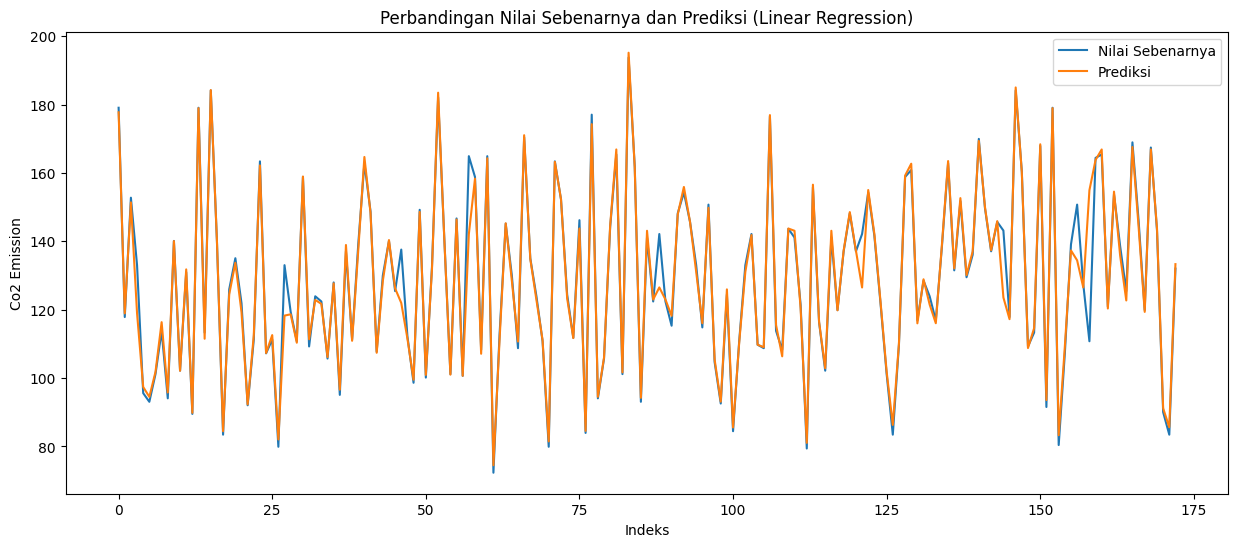


R-squared (Decision Tree Regression): 0.9777347337460933


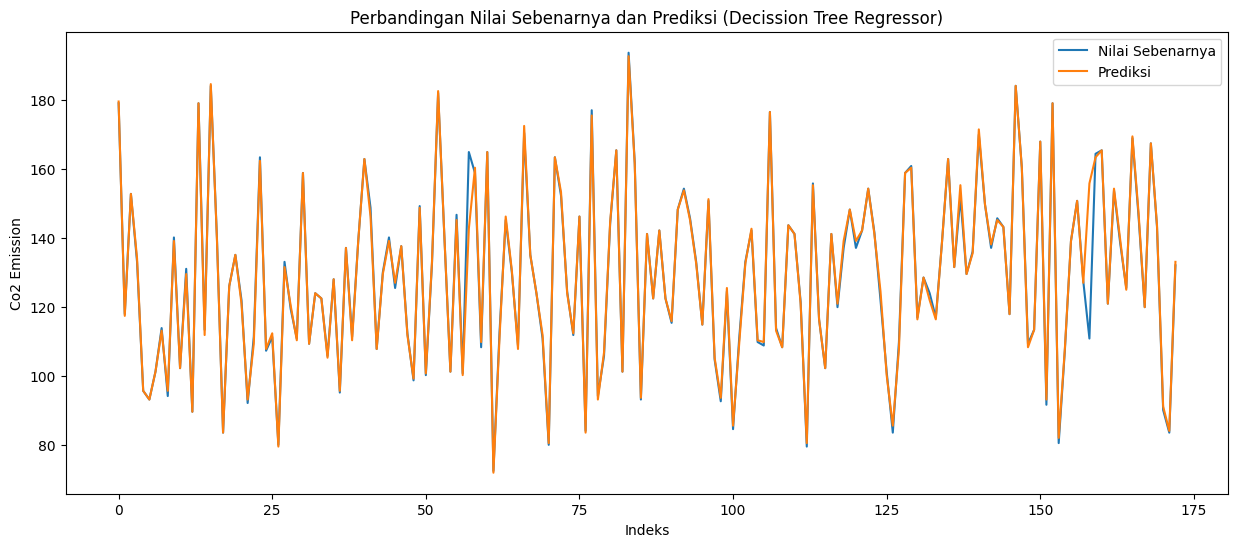


R-squared (Random Forest Regression): 0.9844851768963728


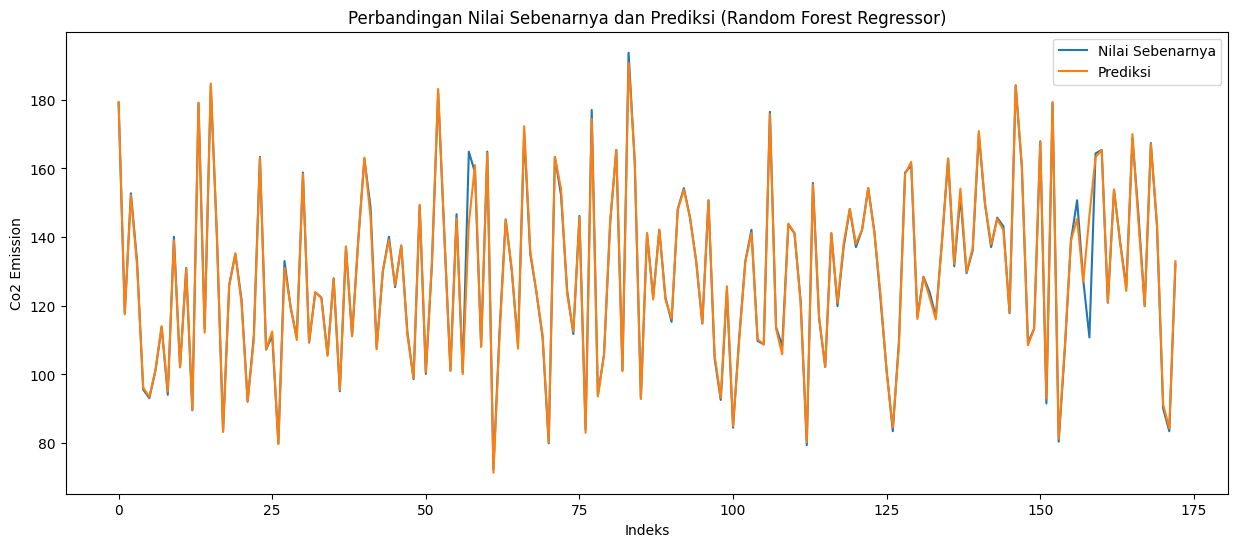


R-squared (XGBoost Regression): 0.9667341454317643


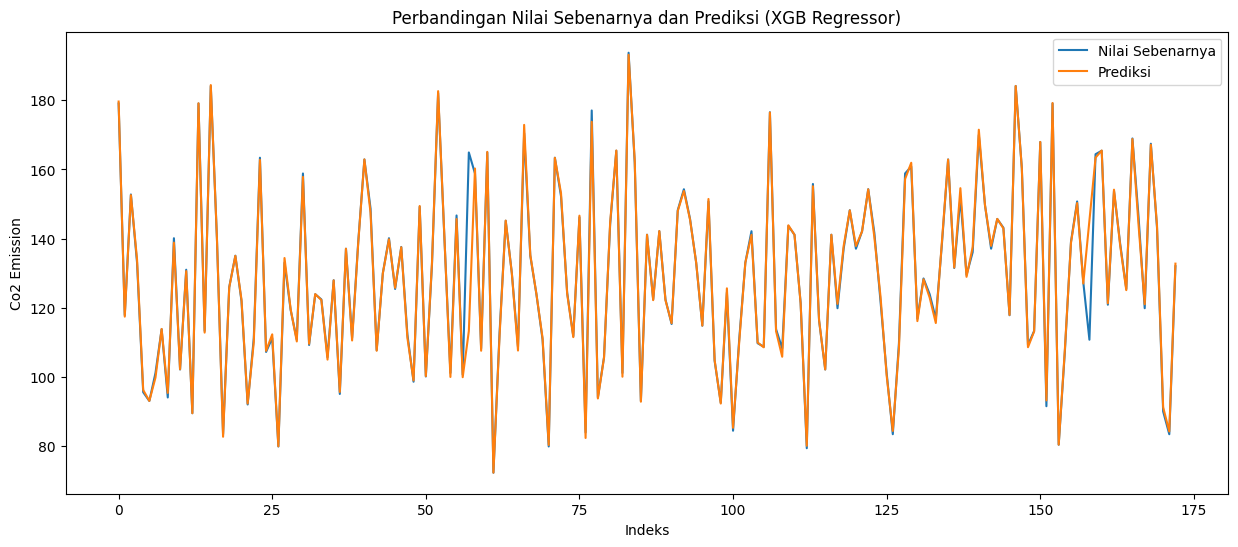

In [ ]:
# Model Regresi Linear
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_y_pred = linear_reg.predict(X_test)
linear_reg_r_squared = r2_score(y_test, linear_reg_y_pred)
print(f"R-squared (Linear Regression): {linear_reg_r_squared}")

# Visualisasi Regresi Linear
y_test_arr = y_test.to_numpy()
y_test_subset = y_test_arr
y_pred_subset = linear_reg_y_pred
plt.figure(figsize=(15, 6))
plt.plot(y_test_subset, label='Nilai Sebenarnya')
plt.plot(y_pred_subset, label='Prediksi')
plt.title('Perbandingan Nilai Sebenarnya dan Prediksi (Linear Regression)')
plt.xlabel('Indeks')
plt.ylabel('Co2 Emission')
plt.legend()
plt.show()

# Model Regresi Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_reg_y_pred = tree_reg.predict(X_test)
tree_reg_r_squared = r2_score(y_test, tree_reg_y_pred)
print(f"\nR-squared (Decision Tree Regression): {tree_reg_r_squared}")

# Visualisasi Regresi Decision Tree
y_test_arr = y_test.to_numpy()
y_test_subset = y_test_arr
y_pred_subset = tree_reg_y_pred
plt.figure(figsize=(15, 6))
plt.plot(y_test_subset, label='Nilai Sebenarnya')
plt.plot(y_pred_subset, label='Prediksi')
plt.title('Perbandingan Nilai Sebenarnya dan Prediksi (Decission Tree Regressor)')
plt.xlabel('Indeks')
plt.ylabel('Co2 Emission')
plt.legend()
plt.show()

# Model Regresi Random Forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
forest_reg_y_pred = forest_reg.predict(X_test)
forest_reg_r_squared = r2_score(y_test, forest_reg_y_pred)
print(f"\nR-squared (Random Forest Regression): {forest_reg_r_squared}")

# Visualisasi Regresi Random Forest
y_test_arr = y_test.to_numpy()
y_test_subset = y_test_arr
y_pred_subset = forest_reg_y_pred
plt.figure(figsize=(15, 6))
plt.plot(y_test_subset, label='Nilai Sebenarnya')
plt.plot(y_pred_subset, label='Prediksi')
plt.title('Perbandingan Nilai Sebenarnya dan Prediksi (Random Forest Regressor)')
plt.xlabel('Indeks')
plt.ylabel('Co2 Emission')
plt.legend()
plt.show()

# Model Regresi XGBoost
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_reg_y_pred = xgb_reg.predict(X_test)
xgb_reg_r_squared = r2_score(y_test, xgb_reg_y_pred)
print(f"\nR-squared (XGBoost Regression): {xgb_reg_r_squared}")

# Visualisasi Regresi XGBoost
y_test_arr = y_test.to_numpy()
y_test_subset = y_test_arr
y_pred_subset = xgb_reg_y_pred
plt.figure(figsize=(15, 6))
plt.plot(y_test_subset, label='Nilai Sebenarnya')
plt.plot(y_pred_subset, label='Prediksi')
plt.title('Perbandingan Nilai Sebenarnya dan Prediksi (XGB Regressor)')
plt.xlabel('Indeks')
plt.ylabel('Co2 Emission')
plt.legend()
plt.show()

In [ ]:
Image(url="https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/5-fold-cv.jpeg", width=800, height=600)

Gambar diatas merupakan contoh model dari cross validation dengan fold sebanyak 5

In [ ]:
# Misalnya, X adalah data independen dan y adalah data target
X = df.drop(["model-year","vehicle_class_encoding","co2_emission-L/km","co2_rating","smog_rating"], axis=1)
y = df["co2_emission-L/km"]

# Membuat objek model regresi (misalnya, Random Forest)
model = RandomForestRegressor()

# Membuat objek KFold dengan 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Membuat fungsi skor untuk R-squared
scorer = make_scorer(r2_score)

# Melakukan cross-validation dan menghitung skor
r_squared_scores = cross_val_score(model, X, y, cv=kf, scoring=scorer)

# Tampilkan hasil R-squared dari setiap fold
print("Hasil R-squared dari setiap fold:", r_squared_scores)
print("Rata-rata R-squared dari 5-fold cross-validation:", r_squared_scores.mean())

Hasil R-squared dari setiap fold: [0.98186277 0.99857337 0.97538787 0.99797785 0.99368773]
Rata-rata R-squared dari 5-fold cross-validation: 0.9894979205735396


In [ ]:
X_train

,model-year,engine-size-L,Cylinders,Gear,fuel_con_avg-L/100km,fuel_type_encoding,transmission_encoding,brand_encoding
211,2022,5.3,8,8,15.166667,1,2,8
165,2022,2.0,4,9,9.533333,0,1,7
370,2022,5.0,8,8,12.633333,0,1,13
104,2022,4.4,8,8,13.633333,0,1,5
431,2022,2.0,4,10,8.966667,1,1,15
...,...,...,...,...,...,...,...,...
73,2022,2.0,4,8,8.600000,0,1,5
109,2022,2.0,4,8,9.033333,0,1,5
313,2022,3.3,6,10,14.866667,3,1,12
501,2022,2.4,4,9,9.666667,1,2,19


In [ ]:
y_train

211    181.588265
165    113.808801
370    153.262519
104    162.873040
431    106.727365
          ...    
73     102.175013
109    107.738998
313    125.948407
501    116.337886
105    162.873040
Name: co2_emission-L/km, Length: 689, dtype: float64

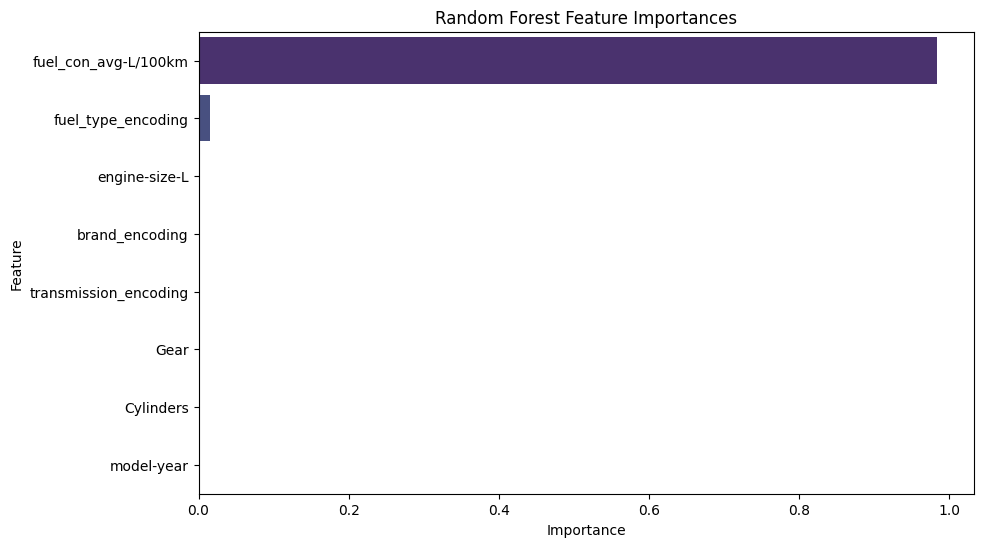

,Feature,Importance
4,fuel_con_avg-L/100km,0.983233
5,fuel_type_encoding,0.014866
1,engine-size-L,0.001347
7,brand_encoding,0.000218
6,transmission_encoding,0.000121
3,Gear,0.000114
2,Cylinders,0.000101
0,model-year,0.000000


In [ ]:
X = X_train
y = y_train

# Menginisialisasi dan melatih model
tree_model = RandomForestRegressor()
tree_model.fit(X, y)

# Mendapatkan feature importances
tree_feature_importance = tree_model.feature_importances_
feature_names = X.columns

# Membuat DataFrame feature importance
tree_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': tree_feature_importance})
tree_feature_importance_df = tree_feature_importance_df.sort_values(by='Importance', ascending=False)
# Menentukan ukuran plot
plt.figure(figsize=(10, 6))

# Membuat bar plot untuk feature importances
sns.barplot(x='Importance', y='Feature', data=tree_feature_importance_df, palette='viridis')

# Menambahkan judul dan label
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Menampilkan plot
plt.show()
display(tree_feature_importance_df)

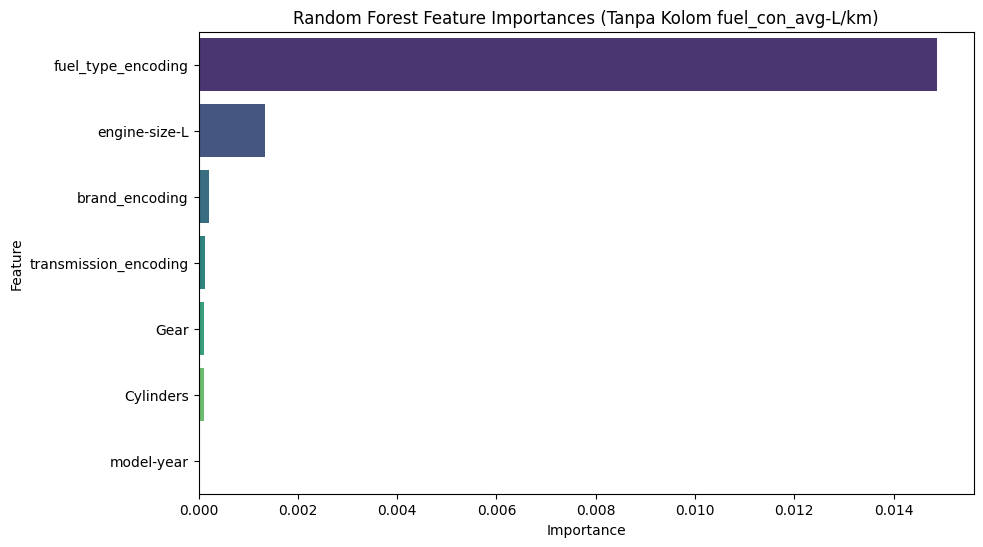

,Feature,Importance
5,fuel_type_encoding,0.014866
1,engine-size-L,0.001347
7,brand_encoding,0.000218
6,transmission_encoding,0.000121
3,Gear,0.000114
2,Cylinders,0.000101
0,model-year,0.000000


In [ ]:
# Menghilangkan kolom 'fuel_con_avg-L/km'
tree_feature_importance_df_filtered = tree_feature_importance_df[tree_feature_importance_df['Feature'] != 'fuel_con_avg-L/100km']

# Menentukan ukuran plot
plt.figure(figsize=(10, 6))

# Membuat bar plot untuk feature importances tanpa kolom 'fuel_con_avg-L/km'
sns.barplot(x='Importance', y='Feature', data=tree_feature_importance_df_filtered, palette='viridis')

# Menambahkan judul dan label
plt.title('Random Forest Feature Importances (Tanpa Kolom fuel_con_avg-L/km)')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Menampilkan plot
plt.show()

# Menampilkan DataFrame feature importances tanpa kolom 'fuel_con_avg-L/km'
display(tree_feature_importance_df_filtered)

Hasil Feature Importance yang paling tinggi adalah kolom fuel_con_avg-L/km

#**Evaluation**

In [ ]:
# Mengimpor modul yang diperlukan

# Evaluasi Model Regresi Linear
mae_linear = mean_absolute_error(y_test, linear_reg_y_pred)
mse_linear = mean_squared_error(y_test, linear_reg_y_pred)
rmse_linear = np.sqrt(mse_linear)
mape_linear = mean_absolute_percentage_error(y_test, linear_reg_y_pred)
# Menambahkan hasil evaluasi MAPE ke laporan evaluasi
print(f"\nEvaluasi Linear Regression:")
print(f"MAE: {mae_linear}")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"MAPE: {mape_linear}")
print(f"R-squared: {linear_reg_r_squared}")

# Evaluasi Model Regresi Decision Tree
mae_tree = mean_absolute_error(y_test, tree_reg_y_pred)
mse_tree = mean_squared_error(y_test, tree_reg_y_pred)
rmse_tree = np.sqrt(mse_tree)
mape_tree = mean_absolute_percentage_error(y_test, tree_reg_y_pred)
# Menambahkan hasil evaluasi MAPE ke laporan evaluasi
print(f"\nEvaluasi Decision Tree Regression:")
print(f"MAE: {mae_tree}")
print(f"MSE: {mse_tree}")
print(f"RMSE: {rmse_tree}")
print(f"MAPE: {mape_tree}")
print(f"R-squared: {tree_reg_r_squared}")

# Evaluasi Model Regresi Random Forest
mae_forest = mean_absolute_error(y_test, forest_reg_y_pred)
mse_forest = mean_squared_error(y_test, forest_reg_y_pred)
rmse_forest = np.sqrt(mse_forest)
mape_forest = mean_absolute_percentage_error(y_test, forest_reg_y_pred)
# Menambahkan hasil evaluasi MAPE ke laporan evaluasi
print(f"\nEvaluasi Random Forest Regression:")
print(f"MAE: {mae_forest}")
print(f"MSE: {mse_forest}")
print(f"RMSE: {rmse_forest}")
print(f"MAPE: {mape_forest}")
print(f"R-squared: {forest_reg_r_squared}")

# Evaluasi Model Regresi XGBoost
mae_xgb = mean_absolute_error(y_test, xgb_reg_y_pred)
mse_xgb = mean_squared_error(y_test, xgb_reg_y_pred)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, xgb_reg_y_pred)
# Menambahkan hasil evaluasi MAPE ke laporan evaluasi
print(f"\nEvaluasi XGBoost Regression:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"MAPE: {mape_xgb}")
print(f"R-squared: {xgb_reg_r_squared}")


Evaluasi Linear Regression:
MAE: 1.9488360486480496
MSE: 26.072051271050878
RMSE: 5.106079833987212
MAPE: 0.015419859582312748
R-squared: 0.9621429643403142

Evaluasi Decision Tree Regression:
MAE: 0.9736244265702989
MSE: 15.334036414098675
RMSE: 3.91586981577512
MAPE: 0.007991405975196039
R-squared: 0.9777347337460933

Evaluasi Random Forest Regression:
MAE: 0.9604997103352408
MSE: 10.6850221199387
RMSE: 3.268795209238214
MAPE: 0.007626309262998408
R-squared: 0.9844851768963728

Evaluasi XGBoost Regression:
MAE: 1.0401790790357723
MSE: 22.91011566977936
RMSE: 4.786451260566575
MAPE: 0.008012359203058324
R-squared: 0.9667341454317643


In [ ]:
# Membuat DataFrame kosong (jika belum ada)
hasil_evaluasi = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R-squared'])

# Menambahkan hasil evaluasi model Linear Regression
linear_row = {'Model': 'Linear Regression', 'MAE': mae_linear, 'MSE': mse_linear, 'RMSE': rmse_linear, 'MAPE': mape_linear, 'R-squared': linear_reg_r_squared}
hasil_evaluasi = pd.concat([hasil_evaluasi, pd.DataFrame([linear_row])], ignore_index=True)

# Menambahkan hasil evaluasi model Decision Tree Regression
tree_row = {'Model': 'Decision Tree Regression', 'MAE': mae_tree, 'MSE': mse_tree, 'RMSE': rmse_tree, 'MAPE': mape_tree, 'R-squared': tree_reg_r_squared}
hasil_evaluasi = pd.concat([hasil_evaluasi, pd.DataFrame([tree_row])], ignore_index=True)

# Menambahkan hasil evaluasi model Random Forest Regression
forest_row = {'Model': 'Random Forest Regression', 'MAE': mae_forest, 'MSE': mse_forest, 'RMSE': rmse_forest, 'MAPE': mape_forest, 'R-squared': forest_reg_r_squared}
hasil_evaluasi = pd.concat([hasil_evaluasi, pd.DataFrame([forest_row])], ignore_index=True)

# Menambahkan hasil evaluasi model XGBoost Regression
xgb_row = {'Model': 'XGBoost Regression', 'MAE': mae_xgb, 'MSE': mse_xgb, 'RMSE': rmse_xgb, 'MAPE': mape_xgb, 'R-squared': xgb_reg_r_squared}
hasil_evaluasi = pd.concat([hasil_evaluasi, pd.DataFrame([xgb_row])], ignore_index=True)

def highlight_max_min(s):
    if s.name == 'R-squared':
        is_max = s == s.max()
        is_min = s == s.min()
        r_squared_style = ['background-color: green' if v else '' for v in is_max]
        return r_squared_style
    else:
        is_min = s == s.min()
        mae_mse_rmse_mape_style = ['background-color: green' if v else '' for v in is_min]
        return mae_mse_rmse_mape_style

df_eval = hasil_evaluasi.style.apply(highlight_max_min, axis=0, subset=['R-squared', 'MAE', 'MSE', 'RMSE', 'MAPE'])

# Menampilkan DataFrame hasil evaluasi
display(df_eval)

,Model,MAE,MSE,RMSE,MAPE,R-squared
0,Linear Regression,1.948836,26.072051,5.106080,0.015420,0.962143
1,Decision Tree Regression,0.973624,15.334036,3.915870,0.007991,0.977735
2,Random Forest Regression,0.960500,10.685022,3.268795,0.007626,0.984485
3,XGBoost Regression,1.040179,22.910116,4.786451,0.008012,0.966734


Pengambilan model terbaik diambil berdasarkan
- Semakin tinggi nilai R-squared, semakin baik model dalam menjelaskan variasi dalam data.
- MAE mengukur rata-rata dari nilai absolut dari selisih antara prediksi dan nilai sebenarnya.
- MSE mengukur rata-rata dari kuadrat selisih antara prediksi dan nilai sebenarnya.
- RMSE adalah akar kuadrat dari MSE. RMSE mengukur sejauh mana perbedaan antara prediksi dan nilai sebenarnya dalam satuan yang sama dengan variabel target.
- MAPE mengukur kesalahan relatif dalam bentuk persentase.

Semakin rendah nilai dari MAE, MSE, MAPE dan RMSE menunjukkan kinerja yang lebih baik dari suatu model.

**Maka hasil model terbaik adalah Random Forest Regression**

In [ ]:
X_train.head()

,model-year,engine-size-L,Cylinders,Gear,fuel_con_avg-L/100km,fuel_type_encoding,transmission_encoding,brand_encoding
211,2022,5.3,8,8,15.166667,1,2,8
165,2022,2.0,4,9,9.533333,0,1,7
370,2022,5.0,8,8,12.633333,0,1,13
104,2022,4.4,8,8,13.633333,0,1,5
431,2022,2.0,4,10,8.966667,1,1,15


# Prediction

In [ ]:
pred = 'https://raw.githubusercontent.com/Chelseaayu/Chelseaayu/main/Data%20prediksi%20-%20Sheet1%20(3).csv'
predict = pd.read_csv(pred,)
predict

,model-year,brand,transmission,Gear,fuel-type,Cylinders,engine_size-L,fuel_con_avg-L/km
0,2023,Acura,AS,8.0,Z,3,2.0,0.8975
1,2023,Acura,AM,10.0,Z,3,2.0,0.0765
2,2023,Acura,AM,10.0,Z,1,4.0,0.0765
3,2023,Acura,AM,10.0,Z,1,4.0,0.0988
4,2023,Acura,AS,7.0,Z,0,4.0,0.0988
...,...,...,...,...,...,...,...,...
396,2024,Volvo,A,8.0,B,2,5.0,0.8975
397,2024,Volvo,AV,9.0,B,3,2.0,1.5690
398,2024,Volvo,A,9.0,B,3,2.0,0.0765
399,2024,Volvo,AS,8.0,B,3,4.0,0.0765


In [ ]:
predict.dtypes

model-year             int64
brand                 object
transmission          object
Gear                 float64
fuel-type             object
Cylinders              int64
engine_size-L        float64
fuel_con_avg-L/km    float64
dtype: object

In [ ]:
# mengubah satuan L/km menjadi L/100km
predict['fuel_con_avg-L/km'] = 100 / predict['fuel_con_avg-L/km']

# mengubah nama kolom
predict.rename(columns = {'fuel_con_avg-L/km':'fuel_con_avg-L/100km'}, inplace = True)

In [ ]:
# encoding brand
encod_brand = 'brand'

unique_values_brand = predict[encod_brand].unique()
encoding_mapping_brand = {value: index for index, value in enumerate(unique_values_brand)}
predict['brand_encoding'] = predict[encod_brand].map(encoding_mapping_brand)
predict

,model-year,brand,transmission,Gear,fuel-type,Cylinders,engine_size-L,fuel_con_avg-L/100km,brand_encoding
0,2023,Acura,AS,8.0,Z,3,2.0,111.420613,0
1,2023,Acura,AM,10.0,Z,3,2.0,1307.189542,0
2,2023,Acura,AM,10.0,Z,1,4.0,1307.189542,0
3,2023,Acura,AM,10.0,Z,1,4.0,1012.145749,0
4,2023,Acura,AS,7.0,Z,0,4.0,1012.145749,0
...,...,...,...,...,...,...,...,...,...
396,2024,Volvo,A,8.0,B,2,5.0,111.420613,33
397,2024,Volvo,AV,9.0,B,3,2.0,63.734863,33
398,2024,Volvo,A,9.0,B,3,2.0,1307.189542,33
399,2024,Volvo,AS,8.0,B,3,4.0,1307.189542,33


In [ ]:
encoding_mapping_brand

{'Acura': 0,
 'Alfa Romeo': 1,
 'Aston martin': 2,
 'Audi': 3,
 'Bentley': 4,
 'BMW': 5,
 'Bugati': 6,
 'Buick': 7,
 'Cadillac': 8,
 'Chevrolet': 9,
 'Chrysler': 10,
 'Dodge': 11,
 'Ford': 12,
 'Genesis': 13,
 'GMC': 14,
 'Honda': 15,
 'Hyundai': 16,
 'Infiniti': 17,
 'Jaguar': 18,
 'Jeep': 19,
 'Kia': 20,
 'Lamborghini': 21,
 'Land Rover': 22,
 'Lexus': 23,
 'Lincoln': 24,
 'Maserati': 25,
 'Mazda': 26,
 'Mercedes-Benz': 27,
 'Nissan': 28,
 'Porsche': 29,
 'Rolls-Royce': 30,
 'Subaru': 31,
 'Toyota': 32,
 'Volvo': 33}

In [ ]:
# encoding transmission
encod_trans = 'transmission'

unique_values_trans = predict[encod_trans].unique()
encoding_mapping_trans = {value: index for index, value in enumerate(unique_values_trans)}
predict['transmission_encoding'] = predict[encod_trans].map(encoding_mapping_trans)
predict

,model-year,brand,transmission,Gear,fuel-type,Cylinders,engine_size-L,fuel_con_avg-L/100km,brand_encoding,transmission_encoding
0,2023,Acura,AS,8.0,Z,3,2.0,111.420613,0,0
1,2023,Acura,AM,10.0,Z,3,2.0,1307.189542,0,1
2,2023,Acura,AM,10.0,Z,1,4.0,1307.189542,0,1
3,2023,Acura,AM,10.0,Z,1,4.0,1012.145749,0,1
4,2023,Acura,AS,7.0,Z,0,4.0,1012.145749,0,0
...,...,...,...,...,...,...,...,...,...,...
396,2024,Volvo,A,8.0,B,2,5.0,111.420613,33,2
397,2024,Volvo,AV,9.0,B,3,2.0,63.734863,33,4
398,2024,Volvo,A,9.0,B,3,2.0,1307.189542,33,2
399,2024,Volvo,AS,8.0,B,3,4.0,1307.189542,33,0


In [ ]:
encoding_mapping_trans

{'AS': 0, 'AM': 1, 'A': 2, 'M': 3, 'AV': 4}

In [ ]:
# encoding fuel-type
encod_fuel = 'fuel-type'

unique_values_fuel = predict[encod_fuel].unique()
encoding_mapping_fuel = {value: index for index, value in enumerate(unique_values_fuel)}
predict['fuel_type_encoding'] = predict[encod_fuel].map(encoding_mapping_fuel)
predict

,model-year,brand,transmission,Gear,fuel-type,Cylinders,engine_size-L,fuel_con_avg-L/100km,brand_encoding,transmission_encoding,fuel_type_encoding
0,2023,Acura,AS,8.0,Z,3,2.0,111.420613,0,0,0
1,2023,Acura,AM,10.0,Z,3,2.0,1307.189542,0,1,0
2,2023,Acura,AM,10.0,Z,1,4.0,1307.189542,0,1,0
3,2023,Acura,AM,10.0,Z,1,4.0,1012.145749,0,1,0
4,2023,Acura,AS,7.0,Z,0,4.0,1012.145749,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
396,2024,Volvo,A,8.0,B,2,5.0,111.420613,33,2,6
397,2024,Volvo,AV,9.0,B,3,2.0,63.734863,33,4,6
398,2024,Volvo,A,9.0,B,3,2.0,1307.189542,33,2,6
399,2024,Volvo,AS,8.0,B,3,4.0,1307.189542,33,0,6


In [ ]:
encoding_mapping_fuel

{'Z': 0, 'D': 1, 'E': 2, 'X': 3, 'B/X': 4, 'B/Z': 5, 'B': 6}

In [ ]:
# menghapus kolom yang tidak dibutuhkan
drop_columns = ['brand', 'transmission', 'fuel-type']
predict = predict.drop(columns=drop_columns)
predict

,model-year,Gear,Cylinders,engine_size-L,fuel_con_avg-L/100km,brand_encoding,transmission_encoding,fuel_type_encoding
0,2023,8.0,3,2.0,111.420613,0,0,0
1,2023,10.0,3,2.0,1307.189542,0,1,0
2,2023,10.0,1,4.0,1307.189542,0,1,0
3,2023,10.0,1,4.0,1012.145749,0,1,0
4,2023,7.0,0,4.0,1012.145749,0,0,0
...,...,...,...,...,...,...,...,...
396,2024,8.0,2,5.0,111.420613,33,2,6
397,2024,9.0,3,2.0,63.734863,33,4,6
398,2024,9.0,3,2.0,1307.189542,33,2,6
399,2024,8.0,3,4.0,1307.189542,33,0,6


In [ ]:
from sklearn.impute import SimpleImputer

# Mendefinisikan imputer dengan strategi yang sesuai (misalnya, mean, median, atau most_frequent)
imputer = SimpleImputer(strategy='mean')  # Gantilah dengan strategi yang sesuai

# Mengisi nilai NaN pada data prediksi
predict_imputed = imputer.fit_transform(predict)

# Membuat DataFrame untuk data prediksi yang telah diimputasi
prediksi_df = pd.DataFrame(predict_imputed, columns=['model-year', 'Gear', 'Cylinders', 'engine-size-L', 'fuel_con_avg-L/100km', 'brand_encoding', 'transmission_encoding', 'fuel_type_encoding'])
# Memberi nama fitur pada DataFrame
prediksi_df.columns = ['model-year', 'Gear', 'Cylinders', 'engine-size-L', 'fuel_con_avg-L/100km', 'brand_encoding', 'transmission_encoding', 'fuel_type_encoding']

# Kolom untuk prediksi
predict_columns = ['co2_emission-L/km']
hasil_predict = []

for index, row in prediksi_df.iterrows():
    # Mengambil hanya fitur yang digunakan pada saat pelatihan
    fitur_prediksi = row[['model-year', 'Gear', 'Cylinders', 'engine-size-L', 'fuel_con_avg-L/100km', 'brand_encoding', 'transmission_encoding', 'fuel_type_encoding']]

    # Melakukan prediksi untuk setiap model
    hasil_prediksi_forest = forest_reg.predict([fitur_prediksi])[0]

    # Menambahkan hasil prediksi ke dalam list
    hasil_predict.append(hasil_prediksi_forest)

# Menambahkan hasil prediksi ke dalam DataFrame
compare_model = pd.concat([prediksi_df, pd.DataFrame(hasil_predict, columns=predict_columns)], axis=1)

# Menampilkan DataFrame untuk melihat hasil perbandingan model
compare_model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

,model-year,Gear,Cylinders,engine-size-L,fuel_con_avg-L/100km,brand_encoding,transmission_encoding,fuel_type_encoding,co2_emission-L/km
0,2023.0,8.0,3.0,2.0,111.420613,0.0,0.0,0.0,190.196161
1,2023.0,10.0,3.0,2.0,1307.189542,0.0,1.0,0.0,190.192788
2,2023.0,10.0,1.0,4.0,1307.189542,0.0,1.0,0.0,190.192788
3,2023.0,10.0,1.0,4.0,1012.145749,0.0,1.0,0.0,190.192788
4,2023.0,7.0,0.0,4.0,1012.145749,0.0,0.0,0.0,190.196161
...,...,...,...,...,...,...,...,...,...
396,2024.0,8.0,2.0,5.0,111.420613,33.0,2.0,6.0,166.924633
397,2024.0,9.0,3.0,2.0,63.734863,33.0,4.0,6.0,166.924633
398,2024.0,9.0,3.0,2.0,1307.189542,33.0,2.0,6.0,166.924633
399,2024.0,8.0,3.0,4.0,1307.189542,33.0,0.0,6.0,166.966363


In [ ]:
compare_model

,model-year,Gear,Cylinders,engine-size-L,fuel_con_avg-L/100km,brand_encoding,transmission_encoding,fuel_type_encoding,co2_emission-L/km
0,2023.0,8.0,3.0,2.0,111.420613,0.0,0.0,0.0,190.196161
1,2023.0,10.0,3.0,2.0,1307.189542,0.0,1.0,0.0,190.192788
2,2023.0,10.0,1.0,4.0,1307.189542,0.0,1.0,0.0,190.192788
3,2023.0,10.0,1.0,4.0,1012.145749,0.0,1.0,0.0,190.192788
4,2023.0,7.0,0.0,4.0,1012.145749,0.0,0.0,0.0,190.196161
...,...,...,...,...,...,...,...,...,...
396,2024.0,8.0,2.0,5.0,111.420613,33.0,2.0,6.0,166.924633
397,2024.0,9.0,3.0,2.0,63.734863,33.0,4.0,6.0,166.924633
398,2024.0,9.0,3.0,2.0,1307.189542,33.0,2.0,6.0,166.924633
399,2024.0,8.0,3.0,4.0,1307.189542,33.0,0.0,6.0,166.966363


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom 'emisi' dari terendah ke tertinggi
compare_model_sorted = compare_model.sort_values(by='co2_emission-L/km', ascending=True)

# Menampilkan DataFrame yang sudah diurutkan
compare_model_sorted.head(10)

,model-year,Gear,Cylinders,engine-size-L,fuel_con_avg-L/100km,brand_encoding,transmission_encoding,fuel_type_encoding,co2_emission-L/km
400,2024.0,9.0,4.0,5.0,1012.145749,33.0,2.0,6.0,166.924633
156,2023.0,9.0,1.0,2.0,63.734863,27.0,2.0,0.0,166.924633
157,2023.0,8.0,4.0,2.0,1307.189542,28.0,4.0,3.0,166.924633
326,2024.0,9.0,5.0,2.0,1307.189542,22.0,2.0,6.0,166.924633
174,2023.0,9.0,1.0,4.0,1307.189542,30.0,2.0,0.0,166.924633
175,2023.0,9.0,2.0,2.0,1012.145749,30.0,2.0,0.0,166.924633
177,2023.0,8.0,3.0,5.0,111.420613,30.0,2.0,0.0,166.924633
178,2023.0,9.0,1.0,5.0,63.734863,30.0,2.0,0.0,166.924633
180,2023.0,8.0,2.0,2.0,1012.145749,31.0,4.0,3.0,166.924633
182,2023.0,6.0,4.0,3.0,111.420613,31.0,3.0,3.0,166.924633


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom 'emisi' dari tertinggi ke terendah
compare_model_sorted = compare_model.sort_values(by='co2_emission-L/km', ascending=False)

# Menampilkan DataFrame yang sudah diurutkan
compare_model_sorted

,model-year,Gear,Cylinders,engine-size-L,fuel_con_avg-L/100km,brand_encoding,transmission_encoding,fuel_type_encoding,co2_emission-L/km
206,2024.0,8.0,2.0,3.0,63.734863,1.0,0.0,0.0,191.535913
209,2024.0,8.0,5.0,3.0,1012.145749,1.0,0.0,0.0,191.535913
10,2023.0,9.0,1.0,3.0,1012.145749,2.0,2.0,0.0,191.514416
207,2024.0,10.0,1.0,2.0,111.420613,1.0,2.0,0.0,191.514416
208,2024.0,9.0,0.0,4.0,1307.189542,1.0,2.0,0.0,191.514416
...,...,...,...,...,...,...,...,...,...
252,2024.0,9.0,2.0,2.0,1307.189542,10.0,2.0,0.0,166.924633
253,2024.0,9.0,2.0,5.0,1307.189542,11.0,2.0,0.0,166.924633
254,2024.0,9.0,4.0,4.0,63.734863,11.0,2.0,0.0,166.924633
255,2024.0,9.0,1.0,3.0,1012.145749,11.0,2.0,0.0,166.924633


In [ ]:
# mengubah satuan co2 emission dari g/km menjadi L/km
# densitas CO2 dalam g/L pada kondisi standar
densitas_co2 = 1.977

compare_model['co2_emission-L/km'] = compare_model['co2_emission-L/km'] * densitas_co2

# mengubah nama kolom dari co2_emission-g/km menjadi co2_emission-L/km
compare_model.rename(columns = {'co2_emission-L/km':'co2_emission-g/km'}, inplace = True)

compare_model_sorted = compare_model.sort_values(by='co2_emission-g/km', ascending=True)
compare_model_sorted.head()

,model-year,Gear,Cylinders,engine-size-L,fuel_con_avg-L/100km,brand_encoding,transmission_encoding,fuel_type_encoding,co2_emission-g/km
400,2024.0,9.0,4.0,5.0,1012.145749,33.0,2.0,6.0,330.01
156,2023.0,9.0,1.0,2.0,63.734863,27.0,2.0,0.0,330.01
157,2023.0,8.0,4.0,2.0,1307.189542,28.0,4.0,3.0,330.01
326,2024.0,9.0,5.0,2.0,1307.189542,22.0,2.0,6.0,330.01
174,2023.0,9.0,1.0,4.0,1307.189542,30.0,2.0,0.0,330.01


Emisi terendah yaitu pada prediksi tahun 2024 dari brand Toyota dengan tipe bahan bakar baterai

In [ ]:
# menyimpan hasil data preparation untuk dilakukan visualisasi pada Google Data Studio
compare_model.to_csv('Vehicle_Product_Research_for_Better_Emission_Predict.csv', index = False)

#**Deployment**

Meningkatkan produksi mobil berbahan bakar hybrid terutama yang hemat bahan bakar